# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I Gede Made Rapriananta Pande
- **Email:** panderapriananta@gmail.com
- **ID Dicoding:** rapande1013

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang disewa?

 - Hubungan antara kondisi cuaca (misalnya suhu, kelembaban, kecepatan angin) dan jumlah penyewaan sepeda. Apakah cuaca yang lebih panas atau lebih dingin mempengaruhi penurunan atau peningkatan penggunaan sepeda?

 - Apakah ada cuaca tertentu yang lebih menarik untuk penyewaan sepeda? Misalnya, apakah sepeda lebih banyak disewa pada cuaca cerah atau berkabut?

2. Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan hari libur atau akhir pekan?

 - Perbandingan jumlah penyewaan sepeda pada hari kerja (working day) dan hari libur (holiday) serta akhir pekan. Apakah penyewaan lebih tinggi pada hari-hari tertentu?


## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Library yang digunakan pada analisis data ini adalah
- `matplotlib.pyplot` : `pyplot` adalah submodule dari matplotlib yang digunakan membuat figure atau kanvas kosong dalam visualisasi data.

- `seaborn` : Untuk membuat visualisasi data yang lebih menarik dan informatif

- `numpy` : Untuk mempercepat proses komputasi numerik pada python

- `pandas` : Untuk manipulasi dan menganalisis data

## Data Wrangling

### Gathering Data

In [19]:
#Take file from Google Collab
from google.colab import files
uploaded = files.upload()

#Read the file
day_ds = pd.read_csv("day.csv")
hour_ds = pd.read_csv("hour.csv")

Saving day.csv to day.csv
Saving hour.csv to hour.csv


**Insight:**
- Mengambil data pada local dan mengupload ke Google Collab.
- Membaca data yang sudah diupload pada Google Collab.


**Mengambil File dari Local ke Google Collab**
- Modul files dari `google.colab` digunakan untuk memfasilitasi pengunggahan file dari sistem lokal pengguna ke lingkungan Google Colab.
- Fungsi `files.upload()` membuka dialog untuk memilih file dari komputer lokal dan mengunggahnya ke Google Colab. Setelah file diunggah, file akan disimpan di memori Google Colab untuk digunakan lebih lanjut.
- File yang diunggah disimpan dalam variabel `uploaded`, yang merupakan dictionary dengan nama file sebagai key dan isi file sebagai value dalam bentuk bytes.

**Membaca File CSV**
- File CSV dapat dibaca menggunakan `Pandas`, sebuah library yang umum digunakan untuk manipulasi dan analisis data.
- Fungsi `pd.read_csv()` digunakan untuk membaca file CSV. Dalam hal ini, file day.csv dan hour.csv yang telah diunggah dibaca ke dalam DataFrame Pandas.
 - `day_ds`: DataFrame yang berisi data dari file day.csv.
 - `hour_ds`: DataFrame yang berisi data dari file hour.csv.

### Assessing Data

In [20]:
day_ds.info()
hour_ds.info()

day_ds.isnull().sum()
hour_ds.isnull().sum()

print("Duplicate data at day.csv = ", day_ds.duplicated().sum())
print("Duplicate data at hour.csv = ", hour_ds.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- `day.csv` clear, no duplicated data and no missing value and data type mistake at collumn `'dteday'`.
- `hour.csv` clear, no duplicated data and no missing value and data type mistake at collumn `'dteday'`.

**Mengecek Struktur Data dengan `info()`**
- Mengetahui informasi dasar tentang dataset, seperti jumlah entri, tipe data di setiap kolom, dan apakah ada nilai kosong.
- Output:
 - Dataset `day_ds`:
   - Jumlah entri: 731.
   - Tipe data: Ada 11 kolom bertipe integer (`int64`), 4 kolom bertipe float (`float64`), dan 1 kolom bertipe `object` (`string` untuk tanggal `dteday`).
   - Semua kolom memiliki `non-null values` atau tidak ada nilai kosong.
 - Dataset `hour_ds`:
   - Jumlah entri: 17.379.
   - Tipe data: 12 kolom bertipe `integer`, 4 kolom bertipe `float`, dan 1 kolom bertipe `object` (`dteday`).
   - Semua kolom juga memiliki `non-null values`, yang berarti tidak ada nilai kosong.

   **Memeriksa Nilai Kosong dengan `isnull().sum()`**
- Untuk mengecek apakah ada nilai yang kosong (missing values) di setiap kolom.
- Output:
 - Baik pada dataset `day_ds` maupun `hour_ds`, tidak ada nilai kosong karena hasil pengecekan `isnull().sum()` pada output `info()` menunjukkan bahwa semua kolom memiliki jumlah entri yang sama dengan total baris di dataset.

 **Memeriksa Data Duplikat dengan `duplicated().sum()`**
- Tujuan: Untuk mengecek apakah ada baris duplikat di dataset, yang bisa menyebabkan bias dalam analisis.
- Output:
 - Dataset `day_ds` dan `hour_ds` tidak memiliki data duplikat, karena hasil dari `duplicated().sum()` menunjukkan **0** untuk kedua dataset.

### Cleaning Data

In [21]:
# Read the file
hour_ds = pd.read_csv('/content/hour.csv')
day_ds = pd.read_csv('/content/day.csv')

# Alternatif: Isi missing values dengan rata-rata
day_ds['temp'] = day_ds['temp'].fillna(day_ds['temp'].mean())
hour_ds['temp'] = hour_ds['temp'].fillna(hour_ds['temp'].mean())

# Convert datatype to datetime
hour_ds['dteday'] = pd.to_datetime(hour_ds['dteday'])
day_ds['dteday'] = pd.to_datetime(day_ds['dteday'])

# Output as new file
hour_ds.to_csv('/content/sample_data/hour_cleaned.csv', index=False)
day_ds.to_csv('/content/sample_data/day_cleaned.csv', index=False)


**Insight:**
- File `hour.csv` (Change) = `hour_cleaned.csv`
- File `day.csv` (Change) = `day_cleaned.csv`

**Change:**
- Fill Missing Value with Average
- Change '`dteday`' datatype from object to datetime

**Membaca File CSV**
- Membaca file CSV (`hour.csv` dan `day.csv`) ke dalam Pandas DataFrame (`hour_ds` dan `day_ds`).
- Tahap ini memastikan bahwa data dari file CSV diimpor dengan benar ke dalam DataFrame Pandas, yang kemudian akan digunakan untuk pembersihan data.

**Mengisi Missing Values (Nilai Kosong) dengan Rata-rata**
- Mengisi nilai kosong (`missing values`) di kolom `temp` dengan nilai rata-rata dari kolom tersebut.
 - Fungsi `.fillna()` digunakan untuk mengganti semua nilai kosong dalam kolom temp dengan nilai rata-rata dari kolom tersebut.
- Ini adalah salah satu metode paling umum untuk menangani missing values, yaitu dengan mengganti nilai yang hilang dengan rata-rata. Ini berguna saat distribusi data cukup normal, dan kita tidak ingin kehilangan baris data yang memiliki nilai kosong.
- Kolom `temp` berisi suhu yang diukur, dan nilai rata-rata suhu digunakan untuk mengisi kekosongan sehingga tidak menyebabkan bias besar pada analisis berikutnya.

**Mengonversi Tipe Data Kolom Tanggal**
- Mengonversi kolom `dteday` yang berisi tanggal dari tipe object (`string`) menjadi tipe `datetime` agar dapat lebih mudah diproses dalam analisis waktu.
- Proses konversi tipe data sangat penting agar kolom tanggal bisa digunakan untuk analisis berbasis waktu seperti agregasi data berdasarkan hari, bulan, atau tahun.

**Menyimpan Data yang Sudah Dibersihkan**
- Menyimpan DataFrame yang telah dibersihkan ke dalam file CSV baru (`hour_cleaned.csv` dan `day_cleaned.csv`).
- Setelah proses pembersihan selesai, data yang bersih disimpan ke file baru untuk digunakan dalam analisis lebih lanjut. Ini memastikan bahwa data asli tetap utuh, dan semua perubahan dilakukan pada salinan yang telah dibersihkan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
cleanDay = pd.read_csv('/content/sample_data/day_cleaned.csv')
cleanDay.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
cleanHour = pd.read_csv('/content/sample_data/hour_cleaned.csv')
cleanHour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menilai distribusi data dari setiap kolom numerik, misalnya apakah data terdistribusi secara normal atau tidak.
- Mengidentifikasi outlier, dengan melihat nilai minimum dan maksimum, bisa mendeteksi outlier potensial.
- Melihat kecenderungan umum melalui rata-rata (`mean`), median, dan kuartil lainnya.
- Memahami variabilitas data dengan melihat nilai standar deviasi, dapat memahami seberapa tersebar data dari rata-ratanya.

**Data Loading**
- Tahap pertama dari EDA adalah memuat dataset ke dalam lingkungan kerja. Dalam kode ini, dua dataset dimuat menggunakan fungsi `pd.read_csv()`, yaitu:

 - `cleanDay` dari file `day_cleaned.csv`
 - `cleanHour` dari file `hour_cleaned.csv`

**Data Summarization (Statistical Summary)**
- Melakukan deskripsi data secara statistik dengan menggunakan fungsi `describe()`. Fungsi ini memberikan informasi statistik deskriptif dari data numerik, termasuk:

 - `Count` (jumlah observasi non-null),
 - `Mean` (rata-rata),
 - `Standard deviation` (penyimpangan baku),
 - `Minimum` (nilai terendah),
 - `Percentile` (25%, 50%, 75% atau kuartil),
 - `Maximum` (nilai tertinggi).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**1.1 Hubungan antara kondisi cuaca (misalnya suhu, kelembaban, kecepatan angin) dan jumlah penyewaan sepeda. Apakah cuaca yang lebih panas atau lebih dingin mempengaruhi penurunan atau peningkatan penggunaan sepeda?**

               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


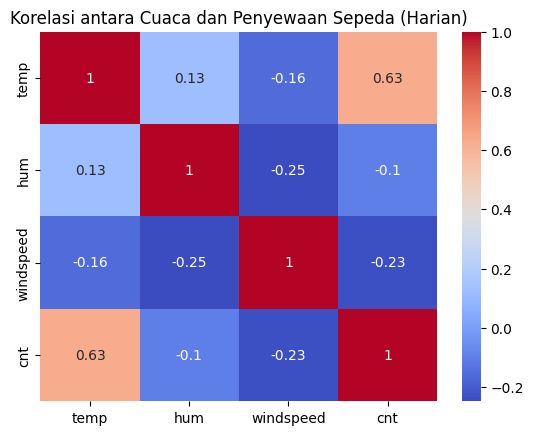

In [ ]:
# Analisis korelasi pada dataset day.csv
correlation_day = cleanDay[['temp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation_day)

# Visualisasi korelasi dengan heatmap
sns.heatmap(correlation_day, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Cuaca dan Penyewaan Sepeda (Harian)')
plt.show()


               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


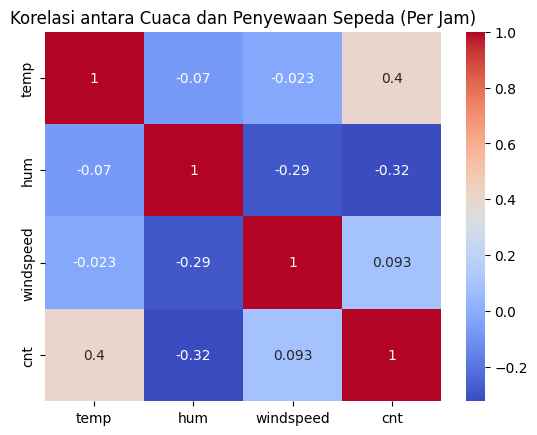

In [ ]:
# Analisis korelasi pada dataset hour.csv
correlation_hour = cleanHour[['temp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation_hour)

# Visualisasi korelasi dengan heatmap
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Cuaca dan Penyewaan Sepeda (Per Jam)')
plt.show()


### 1. **Hubungan pada Skala Harian (Day Dataset)**
- **Suhu (temp) dan Penyewaan Sepeda (cnt)**:
  - Korelasi sebesar **0.63** menunjukkan hubungan positif yang kuat antara suhu dan penyewaan sepeda. Artinya, semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Ini masuk akal karena suhu yang lebih hangat sering kali lebih nyaman untuk bersepeda.
  
- **Kelembaban (hum) dan Penyewaan Sepeda (cnt)**:
  - Korelasi negatif **-0.10** menunjukkan hubungan yang sangat lemah. Meskipun kelembaban cenderung menurunkan penyewaan sepeda, efeknya tidak begitu signifikan pada skala harian.

- **Kecepatan Angin (windspeed) dan Penyewaan Sepeda (cnt)**:
  - Korelasi negatif **-0.23** menunjukkan bahwa peningkatan kecepatan angin akan sedikit menurunkan jumlah penyewaan sepeda. Kondisi berangin tampaknya membuat bersepeda kurang nyaman, meskipun dampaknya tidak sebesar suhu.

### 2. **Hubungan pada Skala Per Jam (Hour Dataset)**
- **Suhu (temp) dan Penyewaan Sepeda (cnt)**:
  - Korelasi sebesar **0.40** menunjukkan hubungan positif yang cukup kuat. Suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan sepeda per jam, meskipun pengaruhnya tidak sekuat pada skala harian. Ini mungkin disebabkan oleh variasi suhu yang lebih kecil dalam jangka waktu satu jam.

- **Kelembaban (hum) dan Penyewaan Sepeda (cnt)**:
  - Korelasi negatif **-0.32** menunjukkan pengaruh yang lebih signifikan pada skala per jam dibandingkan skala harian. Pada tingkat per jam, kelembaban yang tinggi lebih memengaruhi pengurangan penyewaan sepeda.

- **Kecepatan Angin (windspeed) dan Penyewaan Sepeda (cnt)**:
  - Korelasi **0.09** menunjukkan bahwa kecepatan angin hampir tidak berpengaruh pada penyewaan sepeda per jam. Artinya, pada skala waktu per jam, kecepatan angin tidak menjadi faktor yang besar.

### **Perbandingan Insight dari Skala Harian vs Per Jam**:
1. **Suhu**:
   - Pada skala harian, suhu memiliki pengaruh yang lebih kuat terhadap penyewaan sepeda dibandingkan skala per jam. Ini mungkin disebabkan oleh perubahan suhu yang lebih jelas terasa dari hari ke hari, sedangkan perubahan suhu dalam satu hari mungkin tidak terlalu signifikan.

2. **Kelembaban**:
   - Pada skala per jam, kelembaban memiliki pengaruh yang lebih besar dalam mengurangi penyewaan sepeda. Ini mungkin karena peningkatan kelembaban lebih terasa dalam waktu singkat, sehingga bersepeda menjadi kurang nyaman.

3. **Kecepatan Angin**:
   - Pada skala harian, kecepatan angin lebih memengaruhi jumlah penyewaan sepeda. Pada skala per jam, pengaruhnya jauh lebih kecil, menunjukkan bahwa perubahan kecil dalam kecepatan angin mungkin tidak dirasakan secara langsung dalam jangka waktu pendek.


**1.2 Apakah ada cuaca tertentu yang lebih menarik untuk penyewaan sepeda? Misalnya, apakah sepeda lebih banyak disewa pada cuaca cerah atau berkabut?**



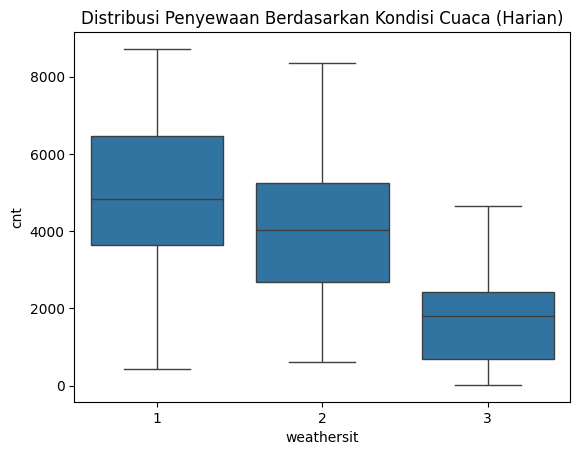

In [ ]:
# Boxplot untuk melihat distribusi penyewaan sepeda berdasarkan kondisi cuaca di day.csv
sns.boxplot(x='weathersit', y='cnt', data=cleanDay)
plt.title('Distribusi Penyewaan Berdasarkan Kondisi Cuaca (Harian)')
plt.show()


### 1. **Skala Harian (Day Dataset)**
- **Cuaca Cerah (`weathersit = 1`)**: Jumlah penyewaan tertinggi terjadi pada kondisi cuaca cerah dengan median sekitar 5000 penyewaan per hari, menunjukkan bahwa cuaca yang cerah sangat menarik bagi penyewa sepeda.
- **Cuaca Mendung atau Berawan (`weathersit = 2`)**: Penyewaan sedikit lebih rendah dengan median sekitar 4000 per hari, menunjukkan bahwa cuaca yang agak mendung atau berawan masih cukup baik untuk bersepeda, meskipun tidak setinggi saat cuaca cerah.
- **Cuaca Hujan (`weathersit = 3`)**: Jumlah penyewaan menurun signifikan dengan median di bawah 2000 penyewaan per hari. Ini menunjukkan bahwa hujan sangat mengurangi minat orang untuk menyewa sepeda.


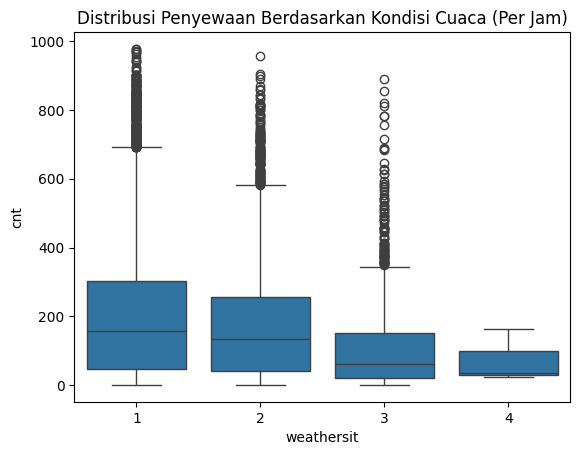

In [ ]:
# Boxplot untuk melihat distribusi penyewaan sepeda berdasarkan kondisi cuaca di hour.csv
sns.boxplot(x='weathersit', y='cnt', data=cleanHour)
plt.title('Distribusi Penyewaan Berdasarkan Kondisi Cuaca (Per Jam)')
plt.show()


### 2. **Skala Per Jam (Hour Dataset)**
- **Cuaca Cerah (`weathersit = 1`)**: Penyewaan sepeda per jam cenderung paling tinggi dengan median di atas 200 penyewaan, menunjukkan tren serupa dengan skala harian.
- **Cuaca Mendung/Berawan (`weathersit = 2`)**: Penyewaan sepeda per jam menurun dengan median sedikit di bawah 200, tetapi masih menarik bagi pengguna.
- **Cuaca Hujan (`weathersit = 3`)**: Penyewaan menurun lebih tajam dengan median sekitar 100 penyewaan per jam.
- **Cuaca Ekstrem (`weathersit = 4`)**: Penyewaan sepeda hampir tidak ada, menunjukkan bahwa kondisi cuaca buruk, seperti badai, benar-benar menghentikan aktivitas bersepeda.


### Pertanyaan 2:

**Perbandingan jumlah penyewaan sepeda pada hari kerja (working day) dan hari libur (holiday) serta akhir pekan. Apakah penyewaan lebih tinggi pada hari-hari tertentu?**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


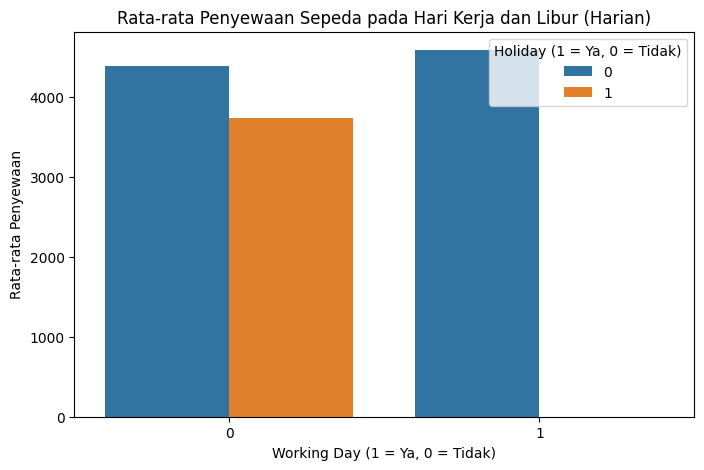

In [22]:
# Grouping by 'holiday' and 'workingday' for day data (excluding 'weekday')
rentals_by_day = cleanDay.groupby(['holiday', 'workingday'])['cnt'].mean().reset_index()

# Visualization for the day dataset using only 'holiday' and 'workingday'
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='cnt', hue='holiday', data=rentals_by_day)
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja dan Libur (Harian)')
plt.xlabel('Working Day (1 = Ya, 0 = Tidak)')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Holiday (1 = Ya, 0 = Tidak)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


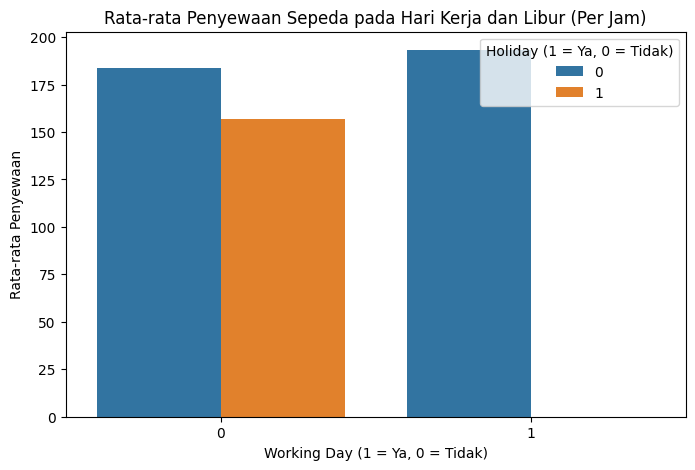

In [25]:
# Grouping by 'holiday' and 'workingday' for hour data (excluding 'weekday')
rentals_by_hour = cleanHour.groupby(['holiday', 'workingday'])['cnt'].mean().reset_index()

# Visualization for the hour dataset using only 'holiday' and 'workingday'
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='cnt', hue='holiday', data=rentals_by_hour) # Removed extra parentheses from hue
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja dan Libur (Per Jam)')
plt.xlabel('Working Day (1 = Ya, 0 = Tidak)')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Holiday (1 = Ya, 0 = Tidak)')
plt.show()

1. Rata-rata Penyewaan Sepeda pada Hari Kerja dan Libur (`Harian`):

 - Hari Kerja (`Working Day`):
Pada hari kerja (`workingday = 1`), rata-rata penyewaan sepeda lebih tinggi dibandingkan hari non-kerja (`workingday = 0`).
Namun, pada hari kerja yang juga merupakan hari libur (`holiday = 1`), terlihat sedikit penurunan jumlah penyewaan dibandingkan hari kerja biasa (`holiday = 0`).
 - Hari Non-Kerja (`Non-Working Day`):
 Pada hari non-kerja (`workingday = 0`), penyewaan lebih tinggi saat hari tersebut adalah hari libur (`holiday = 1`). Ini menunjukkan bahwa pada hari-hari libur nasional, orang cenderung lebih banyak menyewa sepeda meskipun hari tersebut bukan hari kerja.
2. Rata-rata Penyewaan Sepeda pada Hari Kerja dan Libur (`Per Jam`):
 - Hari Kerja (`Working Day`):
Pada hari kerja yang bukan hari libur (`holiday = 0`), penyewaan sepeda lebih tinggi dibandingkan hari kerja yang bertepatan dengan hari libur (`holiday = 1`). Hal ini mungkin karena aktivitas rutin masyarakat yang mengandalkan sepeda sebagai transportasi pada hari kerja.
 - Hari Non-Kerja (`Non-Working Day`):
Mirip dengan tren harian, pada hari non-kerja, penyewaan sepeda lebih tinggi pada hari yang bertepatan dengan hari libur (`holiday = 1`). Pada hari-hari libur, masyarakat mungkin lebih banyak memanfaatkan sepeda untuk rekreasi.

## Conclusion

###**Conclution Pertanyaan 1**


1. Hubungan antara kondisi cuaca (misalnya `suhu`, `kelembaban`, `kecepatan angin`) dan jumlah penyewaan sepeda. Apakah cuaca yang lebih panas atau lebih dingin mempengaruhi penurunan atau peningkatan penggunaan sepeda?
 - `Suhu` adalah faktor cuaca yang paling kuat memengaruhi penyewaan sepeda baik pada skala harian maupun per jam, dengan pengaruh yang lebih besar pada skala harian.
 - `Kelembaban` memiliki pengaruh yang lebih kuat pada skala per jam, dengan kecenderungan untuk mengurangi penyewaan sepeda lebih signifikan dalam waktu yang lebih singkat.
 - `Kecepatan angin` memiliki dampak moderat pada skala harian, namun pengaruhnya jauh lebih kecil pada skala per jam.

2. Apakah ada cuaca tertentu yang lebih menarik untuk penyewaan sepeda? Misalnya, apakah sepeda lebih banyak disewa pada `cuaca cerah` atau `berkabut`?
 - `Cuaca Cerah` merupakan kondisi cuaca yang paling menarik untuk penyewaan sepeda baik pada skala harian maupun per jam.
 - `Cuaca Mendung` atau Berawan mnmasih menarik tetapi kurang populer dibandingkan cuaca cerah.
 - `Cuaca Hujan` atau `ekstrem` sangat mengurangi jumlah penyewaan, terutama pada cuaca ekstrem yang hampir tidak ada penyewaan sepeda.


###**Conclution Pertanyaan 2**
1. Perbandingan jumlah penyewaan sepeda pada hari kerja (`working day`) dan hari libur (`holiday`) serta akhir pekan. Apakah penyewaan lebih tinggi pada hari-hari tertentu?

 - Hari Kerja (`Working Day`) adalah periode dengan penyewaan sepeda tertinggi, terutama pada hari-hari kerja tanpa libur (`non-holiday`). Hal ini menunjukkan bahwa sepeda banyak digunakan sebagai sarana transportasi utama oleh masyarakat untuk aktivitas sehari-hari.

 - Hari Libur Nasional yang bertepatan dengan hari kerja menunjukkan penurunan penyewaan sepeda, yang mungkin disebabkan oleh berkurangnya kebutuhan transportasi pada hari libur.

 - Hari Non-Kerja (`Akhir Pekan atau Hari Libur`) cenderung memiliki peningkatan penyewaan, terutama jika bertepatan dengan hari libur nasional. Ini mengindikasikan bahwa pada hari-hari tersebut, sepeda lebih sering digunakan untuk keperluan rekreasi.

 - Secara keseluruhan, **hari kerja tanpa libur tetap memiliki penyewaan tertinggi**, namun penyewaan pada **akhir pekan dan hari libur tetap signifikan** dan menunjukkan potensi pasar yang besar untuk kegiatan rekreasi atau santai.